In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

In [57]:
city_data_df = pd.DataFrame(city_data_to_load)
ride_data_df = pd.DataFrame(ride_data_to_load)


# Primary Data Frames

In [58]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [59]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [60]:
city_ride_merged_df = pd.merge(ride_data_df, city_data_df, on="city", how="left")
city_ride_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


# Merged Data Frame

In [61]:
city_ride_merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [62]:
city_ride_merged_df = city_ride_merged_df.drop_duplicates()
city_ride_merged_df.info()

total_fare = city_ride_merged_df.sum()["fare"]
total_fare


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


63538.64000000014

In [63]:
total_ride_count= city_ride_merged_df.count()['ride_id']
total_ride_count

2375

# Urban Set

In [64]:
urban_df = pd.DataFrame(city_ride_merged_df.loc[city_ride_merged_df['type'] == "Urban"])
urban_df = urban_df.drop_duplicates()

urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [65]:
ride_count_urban = urban_df.count()['ride_id']
ride_count_urban

1625

In [66]:
ride_count_urban_percent = round((ride_count_urban/total_ride_count)*100,2)
ride_count_urban_percent

68.42

In [67]:
driver_count_urban = urban_df.groupby(['city']).mean()['driver_count']
driver_count_urban.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [68]:
total_rides_urban = urban_df.groupby(['city']).count()['ride_id']
total_rides_urban.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [69]:
avr_fare_urban = urban_df.groupby(['city']).mean()['fare']
avr_fare_urban.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [70]:
urban_combined = pd.DataFrame({"Total Number of Rides(Per City)" : total_rides_urban, "Average Fare($)" : round(avr_fare_urban,2)})
urban_combined.head()

,Total Number of Rides(Per City),Average Fare($)
city,,
Amandaburgh,18,24.64
Barajasview,22,25.33
Carriemouth,27,28.31
Christopherfurt,27,24.50
Deanville,19,25.84


In [71]:
total_value_urban = round(urban_df.sum()['fare'],2)
total_value_urban


39854.38

In [72]:
total_percent_urban = round((total_value_urban/total_fare)*100,2)
total_percent_urban

62.72

# Rural Set

In [73]:
rural_df = pd.DataFrame(city_ride_merged_df.loc[city_ride_merged_df['type'] == "Rural"])
rural_df = rural_df.drop_duplicates()
total_rides_rural = rural_df.count()
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [74]:
ride_count_rural = rural_df.count()['ride_id']
ride_count_rural

125

In [75]:
ride_count_rural_percent = round((ride_count_rural/total_ride_count)*100,2)
ride_count_rural_percent

5.26

In [76]:
driver_count_rural = rural_df.groupby(['city']).mean()['driver_count']
driver_count_rural.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [77]:
total_rides_rural = rural_df.groupby(['city']).count()['ride_id']
total_rides_rural.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [78]:
avr_fare_rural = rural_df.groupby(['city']).mean()['fare']
avr_fare_rural.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [79]:
rural_combined = pd.DataFrame({"Total Number of Rides(Per City)" : total_rides_rural, "Average Fare($)" : round(avr_fare_rural,2)})
rural_combined.head()

,Total Number of Rides(Per City),Average Fare($)
city,,
Bradshawfurt,10,40.06
Garzaport,3,24.12
Harringtonfort,6,33.47
Jessicaport,6,36.01
Lake Jamie,6,34.36


In [80]:
total_value_rural = round(rural_df.sum()['fare'],2)
total_value_rural

4327.93

In [81]:
total_percent_rural = round((total_value_rural/total_fare)*100,2)
total_percent_rural

6.81

# Suburban Set

In [82]:
suburb_df = pd.DataFrame(city_ride_merged_df.loc[city_ride_merged_df['type'] == "Suburban"])
suburb_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [83]:
ride_count_suburb = suburb_df.count()['ride_id']
ride_count_suburb

625

In [84]:
ride_count_suburb_percent = round((ride_count_suburb/total_ride_count)*100,2)
ride_count_suburb_percent

26.32

In [85]:
driver_count_suburb = suburb_df.groupby(['city']).mean()['driver_count']
driver_count_suburb.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [86]:
total_rides_suburb = suburb_df.groupby(['city']).count()['ride_id']
total_rides_suburb.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [87]:
avr_fare_suburb = suburb_df.groupby(['city']).mean()['fare']
avr_fare_suburb.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [88]:
suburb_combined = pd.DataFrame({"Total Number of Rides(Per City)" : total_rides_suburb, "Average Fare($)" : round(avr_fare_suburb,2)})
suburb_combined.head()

,Total Number of Rides(Per City),Average Fare($)
city,,
Barronchester,16,36.42
Bethanyland,18,32.96
Brandonfort,19,35.44
Colemanland,22,30.89
Davidfurt,17,32.00


In [89]:
total_value_suburb = round(suburb_df.sum()['fare'],2)
total_value_suburb

19356.33

In [90]:
total_percent_suburb = round((total_value_suburb/total_fare)*100,2)
total_percent_suburb

30.46

# Bubble Plot(Scatter Plot)

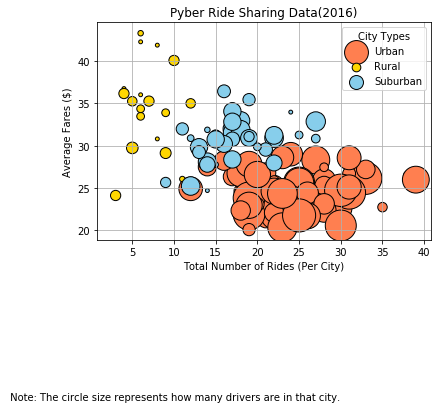

In [91]:
plt.scatter(x=total_rides_urban, y=avr_fare_urban,s=15*driver_count_urban, marker="o", c = "coral",edgecolor="black")

plt.scatter(x=total_rides_rural, y=avr_fare_rural,\
                    s=15*driver_count_rural,marker="o",\
                    c = "gold",edgecolor="black")
plt.scatter(x=total_rides_suburb, y=avr_fare_suburb,\
                     s=15*driver_count_suburb,marker="o", c = "skyblue",edgecolor="black")

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.text(-10,0, " Note: The circle size represents how many drivers are in that city.")
plt.legend(["Urban","Rural", "Suburban"],title='City Types')
plt.grid()
plt.show()

# Pie Charts

Total Fare by City Type

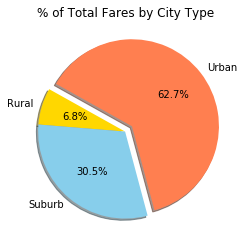

In [92]:
labels = ["Urban", "Rural", "Suburb"]
percent_size = [total_percent_urban, total_percent_rural, total_percent_suburb]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(percent_size, explode=explode, labels=labels, colors=colors,\
             autopct="%1.1f%%", shadow=True, startangle=-75)
plt.title('% of Total Fares by City Type')
plt.show()

Total Ride by City Type

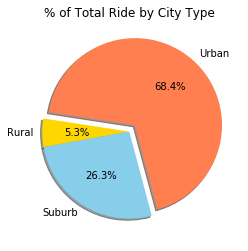

In [93]:
labels = ["Urban", "Rural", "Suburb"]
percent_size = [ride_count_urban_percent, ride_count_rural_percent, ride_count_suburb_percent]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(percent_size, explode=explode, labels=labels, colors=colors,\
             autopct="%1.1f%%", shadow=True, startangle=-75)
plt.title('% of Total Ride by City Type')
plt.show()

Total Drivers by City Type

In [94]:
driver_count_dict_df = pd.DataFrame(city_data_df.groupby('type').sum()['driver_count'])
driver_count_dict_df

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [95]:
total_driver_count = city_data_df.sum()['driver_count']
total_driver_count

2973

In [96]:
urban_driver_count = driver_count_dict_df.iloc[2,:1]
urban_driver_count

driver_count    2405
Name: Urban, dtype: int64

In [97]:
urban_driver_count_percent = round((urban_driver_count/total_driver_count)*100,2)
urban_driver_count_percent

driver_count    80.89
Name: Urban, dtype: float64

In [98]:
rural_driver_count = driver_count_dict_df.iloc[0,:1]
rural_driver_count

driver_count    78
Name: Rural, dtype: int64

In [99]:
rural_driver_count_percent = round((rural_driver_count/total_driver_count)*100,2)
rural_driver_count_percent

driver_count    2.62
Name: Rural, dtype: float64

In [100]:
suburb_driver_count = driver_count_dict_df.iloc[1,:1]
suburb_driver_count

driver_count    490
Name: Suburban, dtype: int64

In [101]:
suburb_driver_count_percent = round((suburb_driver_count/total_driver_count)*100,2)
suburb_driver_count_percent

driver_count    16.48
Name: Suburban, dtype: float64

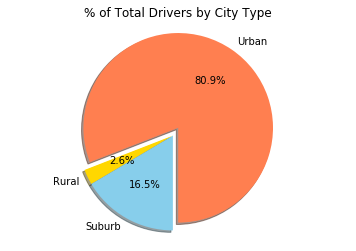

In [102]:
labels = ["Urban", "Rural", "Suburb"]
percent_size = [urban_driver_count_percent, rural_driver_count_percent, suburb_driver_count_percent]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(percent_size, explode=explode, labels=labels, colors=colors,\
             autopct="%1.1f%%", shadow=True, startangle=-90)
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()